In [2]:
from util import *

from src.dataset import load_xray
from src.counterfactual import get_baseline_counterfactuals
import joblib

import warnings
warnings.filterwarnings('ignore')
                        
# Get a model
model = joblib.load('models/pneumonia.gz') # Model should have the BlackBox interface
model

XrayModel(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=401408, out_features=300, bias=True)
  (relu4): ReLU()
  (fc1): Linear(in_features=300, out_features=2, bias=True)
)

In [3]:
loader = iter(load_xray(100, train=False))
X_corpus, _ = next(loader)
X_test, _ = next(loader)

simplex = get_simplex(model, X_corpus, X_test, verbose = True)

Weight Fitting Epoch: 2000/10000 ; Error: 3.07e+04 ; Regulator: 76.6 ; Reg Factor: 1
Weight Fitting Epoch: 4000/10000 ; Error: 8.65e+03 ; Regulator: 49.4 ; Reg Factor: 1
Weight Fitting Epoch: 6000/10000 ; Error: 5e+03 ; Regulator: 31.5 ; Reg Factor: 1
Weight Fitting Epoch: 8000/10000 ; Error: 4.01e+03 ; Regulator: 20.1 ; Reg Factor: 1
Weight Fitting Epoch: 10000/10000 ; Error: 3.65e+03 ; Regulator: 13 ; Reg Factor: 1


In [4]:
i = 10

x = simplex.test_examples[i:i+1]
desired_class = model(x).topk(2).indices[0,1]

baseline_cfs = get_baseline_counterfactuals(model = model, target = desired_class, test = x, corpus = X_corpus)
cfs = simplex.get_counterfactuals(test_id = i, model = model, min_epochs = 50)

 60%|█████████████████████████▏                | 60/100 [00:42<00:28,  1.41it/s]


In [5]:
display_image_cfs(cfs, model, x, desired_class)

No counterfactuals found!


Original || Counterfactual || Diff 


<Figure size 200x600 with 0 Axes>

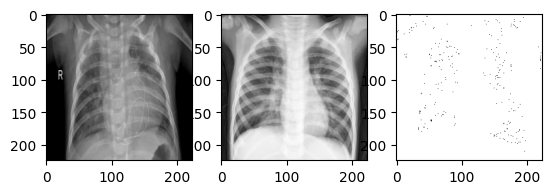

Predicted:  tensor(0)  ||  Desired:  tensor(0)  ||  Orginal:  tensor(1)
Sparsity =  tensor(0.9950)



In [6]:
display_image_cfs(baseline_cfs, model, x, desired_class)